In [97]:
from google.cloud import vision
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import os

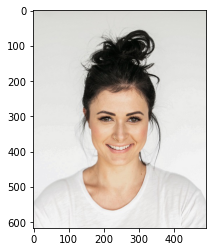

In [98]:
img = cv2.imread("smile.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
#Image credits - @jakenackos - Unsplash

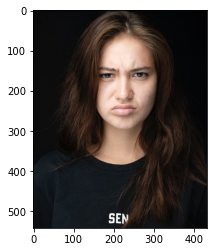

In [99]:
img = cv2.imread("sad.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
#Image credits - @OSPAN ALI - Unsplash  

In [101]:

!ls ~/.jsonkey/vision-api-sa.json

/home/jupyter/.jsonkey/vision-api-sa.json


In [102]:
# Service account key path
credential_path = "/home/jupyter/.jsonkey/vision-api-sa.json"
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = credential_path

In [103]:
def detect_faces(img):
    client = vision.ImageAnnotatorClient()
    response = client.face_detection({'content':img,})
    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))
    return response

In [110]:
def detect_joy_likelihood(imagefile):
    with open(imagefile, 'rb') as image_file:
        content = image_file.read()
        #print(content)
    resp = detect_faces(content)
    faces = resp.face_annotations
    # Names of likelihood from google.cloud.vision.enums
    likelihood_name = ('UNKNOWN', 'VERY_UNLIKELY', 'UNLIKELY', 'POSSIBLE',
                       'LIKELY', 'VERY_LIKELY')
    img = cv2.imread(imagefile)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    print('Faces:')
    for face in faces:
        print('joy: {}'.format(likelihood_name[face.joy_likelihood]))
        joytype = 'joy: {}'.format(likelihood_name[face.joy_likelihood])
        vertices = (['({},{})'.format(vertex.x, vertex.y)
                    for vertex in face.bounding_poly.vertices])
        print(vertices)
        print('face bounds: {}'.format(','.join(vertices)))
        facebounds = eval((','.join(vertices)))  
        cv2.rectangle(img, facebounds[0], facebounds[2], (255,0,255), 2)
        cv2.putText(img,joytype, facebounds[3], cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255,0,255), 2, cv2.LINE_AA)
    plt.figure(figsize = (10,10))
    plt.imshow(img)

Faces:
joy: VERY_LIKELY
['(121,168)', '(367,168)', '(367,453)', '(121,453)']
face bounds: (121,168),(367,168),(367,453),(121,453)


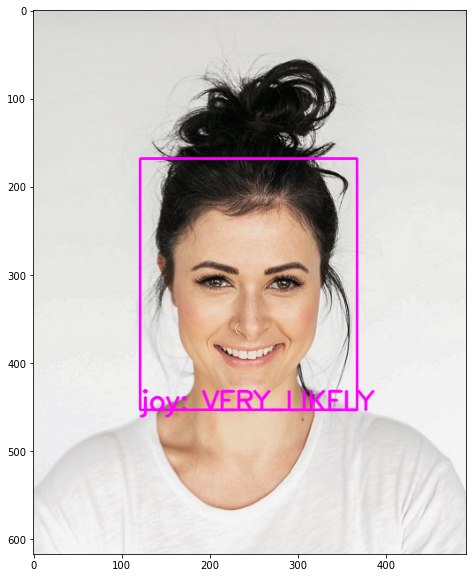

In [111]:
detect_joy_likelihood('./smile.jpg')

Faces:
joy: VERY_UNLIKELY
face bounds: (103,18),(356,18),(356,312),(103,312)


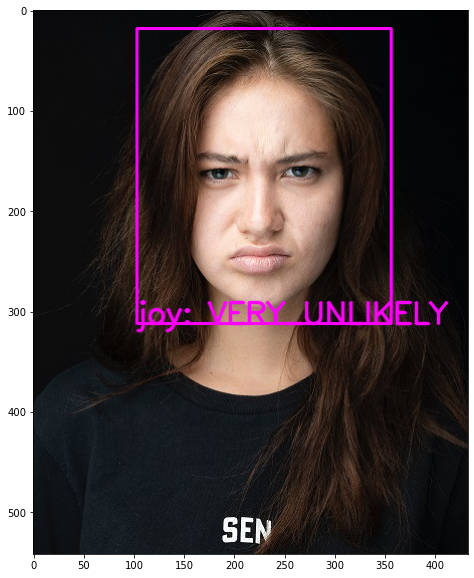

In [106]:
detect_joy_likelihood('./sad.jpg')

Faces:
joy: VERY_LIKELY
face bounds: (711,598),(796,598),(796,696),(711,696)
joy: VERY_LIKELY
face bounds: (558,581),(639,581),(639,675),(558,675)
joy: VERY_LIKELY
face bounds: (239,599),(321,599),(321,694),(239,694)
joy: VERY_LIKELY
face bounds: (422,618),(500,618),(500,709),(422,709)
joy: LIKELY
face bounds: (101,588),(182,588),(182,682),(101,682)


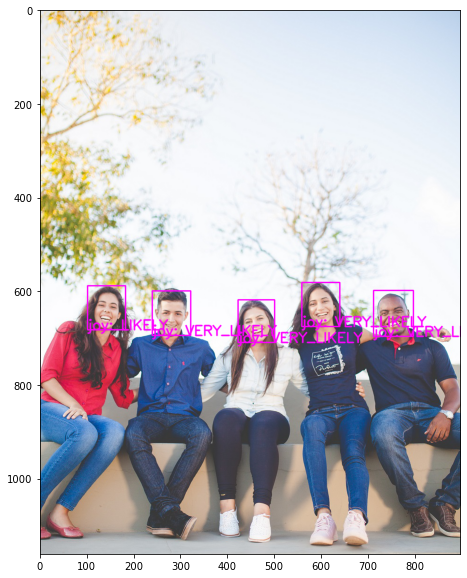

In [107]:
detect_joy_likelihood('./multiple-faces.jpg')